## Nasdaq100 prediction based on apple, amazon, goog, googl, microsoft, tesla, facebook

In [160]:
# https://www.cnbc.com/2020/07/22/these-six-tech-stocks-make-up-half-the-nasdaq-100s-value.html
# Seven tech stocks now make up half the value of the Nasdaq 100
# to see their impact on NASDAQ100
# from 12 Oct 2018 to 9 Oct 2020

In [161]:
import numpy as np
import pandas as pd

In [162]:
app = pd.read_csv('C:/Users/Jacob/AAPL_MLR.csv')
ama = pd.read_csv('C:/Users/Jacob/AMZN_MLR.csv')
goog = pd.read_csv('C:/Users/Jacob/GOOG_MLR.csv')
googl = pd.read_csv('C:/Users/Jacob/GOOGL_MLR.csv')
mcs = pd.read_csv('C:/Users/Jacob/MSFT_MLR.csv')
tes = pd.read_csv('C:/Users/Jacob/TSLA_MLR.csv')
fb = pd.read_csv('C:/Users/Jacob/FB_MLR.csv')
nas = pd.read_csv('C:/Users/Jacob/NASDAQ100_MLR.csv')

In [163]:
app.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-12,55.105000,55.720001,54.209999,55.527500,54.141819,161351600
1,2018-10-15,55.290001,55.457500,54.317501,54.340000,52.983948,123164000
2,2018-10-16,54.732498,55.747501,54.189999,55.537498,54.151566,116736000
3,2018-10-17,55.575001,55.660000,54.834999,55.297501,53.917561,91541600
4,2018-10-18,54.465000,54.935001,53.250000,54.005001,52.657307,130325200


In [164]:
app=app.set_index(['Date'])

In [165]:
app.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-12,55.105000,55.720001,54.209999,55.527500,54.141819,161351600
2018-10-15,55.290001,55.457500,54.317501,54.340000,52.983948,123164000
2018-10-16,54.732498,55.747501,54.189999,55.537498,54.151566,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.917561,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,52.657307,130325200


In [166]:
ama=ama.set_index(['Date'])
goog=goog.set_index(['Date'])
googl=googl.set_index(['Date'])
mcs=mcs.set_index(['Date'])
tes=tes.set_index(['Date'])
fb=fb.set_index(['Date'])
nas=nas.set_index(['Date'])

In [167]:
app=app['Close']

In [168]:
app.head()

Date
2018-10-12    55.527500
2018-10-15    54.340000
2018-10-16    55.537498
2018-10-17    55.297501
2018-10-18    54.005001
Name: Close, dtype: float64

In [169]:
ama=ama['Close']
goog=goog['Close']
googl=googl['Close']
mcs=mcs['Close']
tes=tes['Close']
fb=fb['Close']
nas=nas['Close']

In [170]:
panel=pd.DataFrame(index=nas.index)

In [171]:
panel['app']=app
panel['ama']=ama
panel['goog']=goog
panel['googl']=googl
panel['mcs']=mcs
panel['tes']=tes
panel['fb']=fb
panel['nas']=nas

In [172]:
panel

,app,ama,goog,googl,mcs,tes,fb,nas
Date,,,,,,,,
2018-10-12,55.527500,1788.609985,1110.079956,1120.540039,109.570000,51.756001,153.740005,7157.209961
2018-10-15,54.340000,1760.949951,1092.250000,1102.439941,107.599998,51.917999,153.520004,7068.669922
2018-10-16,55.537498,1819.959961,1121.280029,1133.079956,111.000000,55.318001,158.779999,7276.430176
2018-10-17,55.297501,1831.729980,1115.689941,1127.589966,110.709999,54.355999,159.419998,7278.629883
2018-10-18,54.005001,1770.719971,1087.969971,1097.910034,108.500000,52.782001,154.919998,7116.089844
...,...,...,...,...,...,...,...,...
2020-10-05,116.500000,3199.199951,1486.020020,1482.829956,210.380005,425.679993,264.649994,11509.059570
2020-10-06,113.160004,3099.959961,1453.439941,1451.020020,205.910004,413.980011,258.660004,11291.269531
2020-10-07,115.080002,3195.689941,1460.290039,1459.140015,209.830002,425.299988,258.119995,11503.190430


In [173]:
panel.isnull().sum(axis=0)

app      0
ama      0
goog     0
googl    0
mcs      0
tes      0
fb       0
nas      0
dtype: int64

## Data Splitting 

In [174]:
#80% for training data, 20% for testing data, 402 for training, 100 for testing

In [175]:
Train= panel.iloc[0:402, :]
Test = panel.iloc[402:, :]
print(Train.shape, Test.shape)

(402, 8) (100, 8)


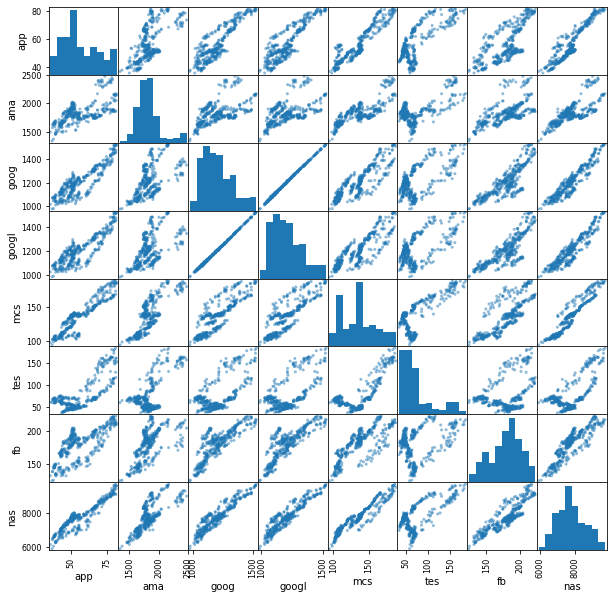

In [176]:
# pandas.tools.plotting is changed to pandas.plotting
from pandas.plotting import scatter_matrix
s_m = scatter_matrix(Train, figsize=(10, 10))

In [177]:
panel.corr()

,app,ama,goog,googl,mcs,tes,fb,nas
app,1.000000,0.921463,0.915612,0.913888,0.952032,0.929696,0.912870,0.979970
ama,0.921463,1.000000,0.811483,0.811326,0.907950,0.939290,0.883693,0.941714
goog,0.915612,0.811483,1.000000,0.999698,0.923667,0.788811,0.916358,0.944237
googl,0.913888,0.811326,0.999698,1.000000,0.919802,0.788744,0.914520,0.942896
mcs,0.952032,0.907950,0.923667,0.919802,1.000000,0.852981,0.914642,0.971195
tes,0.929696,0.939290,0.788811,0.788744,0.852981,1.000000,0.815409,0.909680
fb,0.912870,0.883693,0.916358,0.914520,0.914642,0.815409,1.000000,0.959539
nas,0.979970,0.941714,0.944237,0.942896,0.971195,0.909680,0.959539,1.000000


In [178]:
#adjusted R-squared is large
#coeff to compare which variable is the most important
#app is the most important, it has the largest absolute value
import statsmodels.formula.api as smf
formula = 'nas~app+ama+goog+googl+mcs+tes+fb'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nas   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6208.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        03:53:10   Log-Likelihood:                -2308.4
No. Observations:                 402   AIC:                             4633.
Df Residuals:                     394   BIC:                             4665.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1246.4527     82.732     15.066      0.000    1083.802    1409.103
app           15.6563      1.109     14.115      0.000      13.476      17.837
ama            0.4859      0.042     11.576      0.000       0.403       0.568
goog          -4.3611      1.669     -2.613      0.009      -7.642      -1.080
googl          6.0833      1.668      3.648      0.000       2.805       9.362
mcs            7.6309      0.879      8.678      0.000       5.902       9.360
tes            0.1932      0.278      0.696      0.487      -0.352       0.739
fb             8.9635      0.523     17.154      0.000       7.936       9.991
==============================================================================
Omnibus:                       11.130   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.366
Skew:                          -0.408   Prob(JB):                      0.00340
Kurtosis:                       3.109   Cond. No.                     5.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

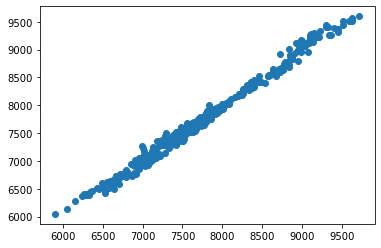

In [180]:
import matplotlib.pyplot as plt
plt.scatter(Train['nas'], Train['PredictedY'])
###eg x=6500, y=6500; x=9500,y=9500 =>good model slope equals to 1 => actual = predicted

In [181]:
#The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift 
#in the independent variable while holding other variables in the model constant. 
#This property of holding the other variables constant is crucial because it allows you to assess
#the effect of each variablein isolation from the others.
#### may have binding variables ####

In [182]:
#The Durbin-Watson statistic will always have a value between 0 and 4. 
#A value of 2.0 means that there is no autocorrelation detected in the sample. 
#Values from 0 to less than 2 indicate positive autocorrelation
#Values from from 2 to 4 indicate negative autocorrelation.
#https://www.investopedia.com/terms/d/durbin-watson-statistic.asp#:~:text=The%20Durbin%2DWatson%20statistic%20will,to%204%20indicate%20negative%20autocorrelation.

In [183]:
#difference between R2 and adjusted R2
#https://discuss.analyticsvidhya.com/t/difference-between-r-square-and-adjusted-r-square/264/3

#The correlation coefficient provides a measure of linear association between X and Y with no adjustment for other variables.
#If you estimate a simple linear regression model (with X as the only explanatory variable and Y as the outcome variable), 
#the raw and standardized regression coefficients will have the same sign as the correlation between X and Y, 
#and the standardized regression coefficient (which is what many people mean when they talk about a Beta coefficient in regression)
#will be equivalent to the correlation.
#But as soon as you include one or more additional explanatory variables in the model, 
#there is no reason to expect the signs to remain the same. 

In [184]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [185]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [186]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'nas')

,Train,Test
R2,0.990809,0.892343
RMSE,76.391307,150.314065


In [187]:
### add this to remove the above error
import warnings
warnings.filterwarnings("ignore")